In [21]:
#Importing Necessary packages:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [ ]:
# A dictionary of 23 'companies_dict' is defined where 'key' is company's name 
#and 'value' is company's stock code. 
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [ ]:
pip install yfinance

In [22]:
#Stock market data is extracted from yahoo finance for two years.
#The stock movement of companies would be compared based on these 6 parameters 
#:- 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'.
#data_source = 'yahoo' # Source of data is yahoo finance.
import yfinance as yf
start_date = '2021-01-01'
end_date = '2023-12-31'
df = yf.download(list(companies_dict.values()),start_date,end_date)
companies_dict.values()

[*********************100%***********************]  23 of 23 completed


dict_values(['AMZN', 'AAPL', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'XOM', 'CVX', 'VLO', 'F', 'BAC'])

In [ ]:
#Numpy arrays are more convenient. So 'stock_open' and 'stock_close' are defined as follows :-
import numpy as np
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [ ]:
#'movement' is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) 
#and negative movement suggests to short the stock(sell).
movements = stock_close-stock_open

In [23]:
sum_of_movement = np.sum(movements,1)

In [24]:
#The company and its 'sum_of_movement' is printed:
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:60.33974838256836
company:AMZN, Change:-80.3515396118164
company:AXP, Change:-56.560020446777344
company:BA, Change:-308.2000503540039
company:BAC, Change:-12.499996185302734
company:CVX, Change:27.210105895996094
company:F, Change:-6.590005397796631
company:GE, Change:-37.05704116821289
company:HMC, Change:-7.079988479614258
company:IBM, Change:29.136138916015625
company:INTC, Change:-13.060026168823242
company:JNJ, Change:22.599929809570312
company:KO, Change:-13.530025482177734
company:LMT, Change:66.42010498046875
company:MA, Change:-19.819290161132812
company:MCD, Change:29.190170288085938
company:MSFT, Change:50.939971923828125
company:NOC, Change:214.35031127929688
company:PEP, Change:4.21002197265625
company:TM, Change:-67.0699234008789
company:TXN, Change:25.32007598876953
company:VLO, Change:-9.640029907226562
company:XOM, Change:17.129928588867188


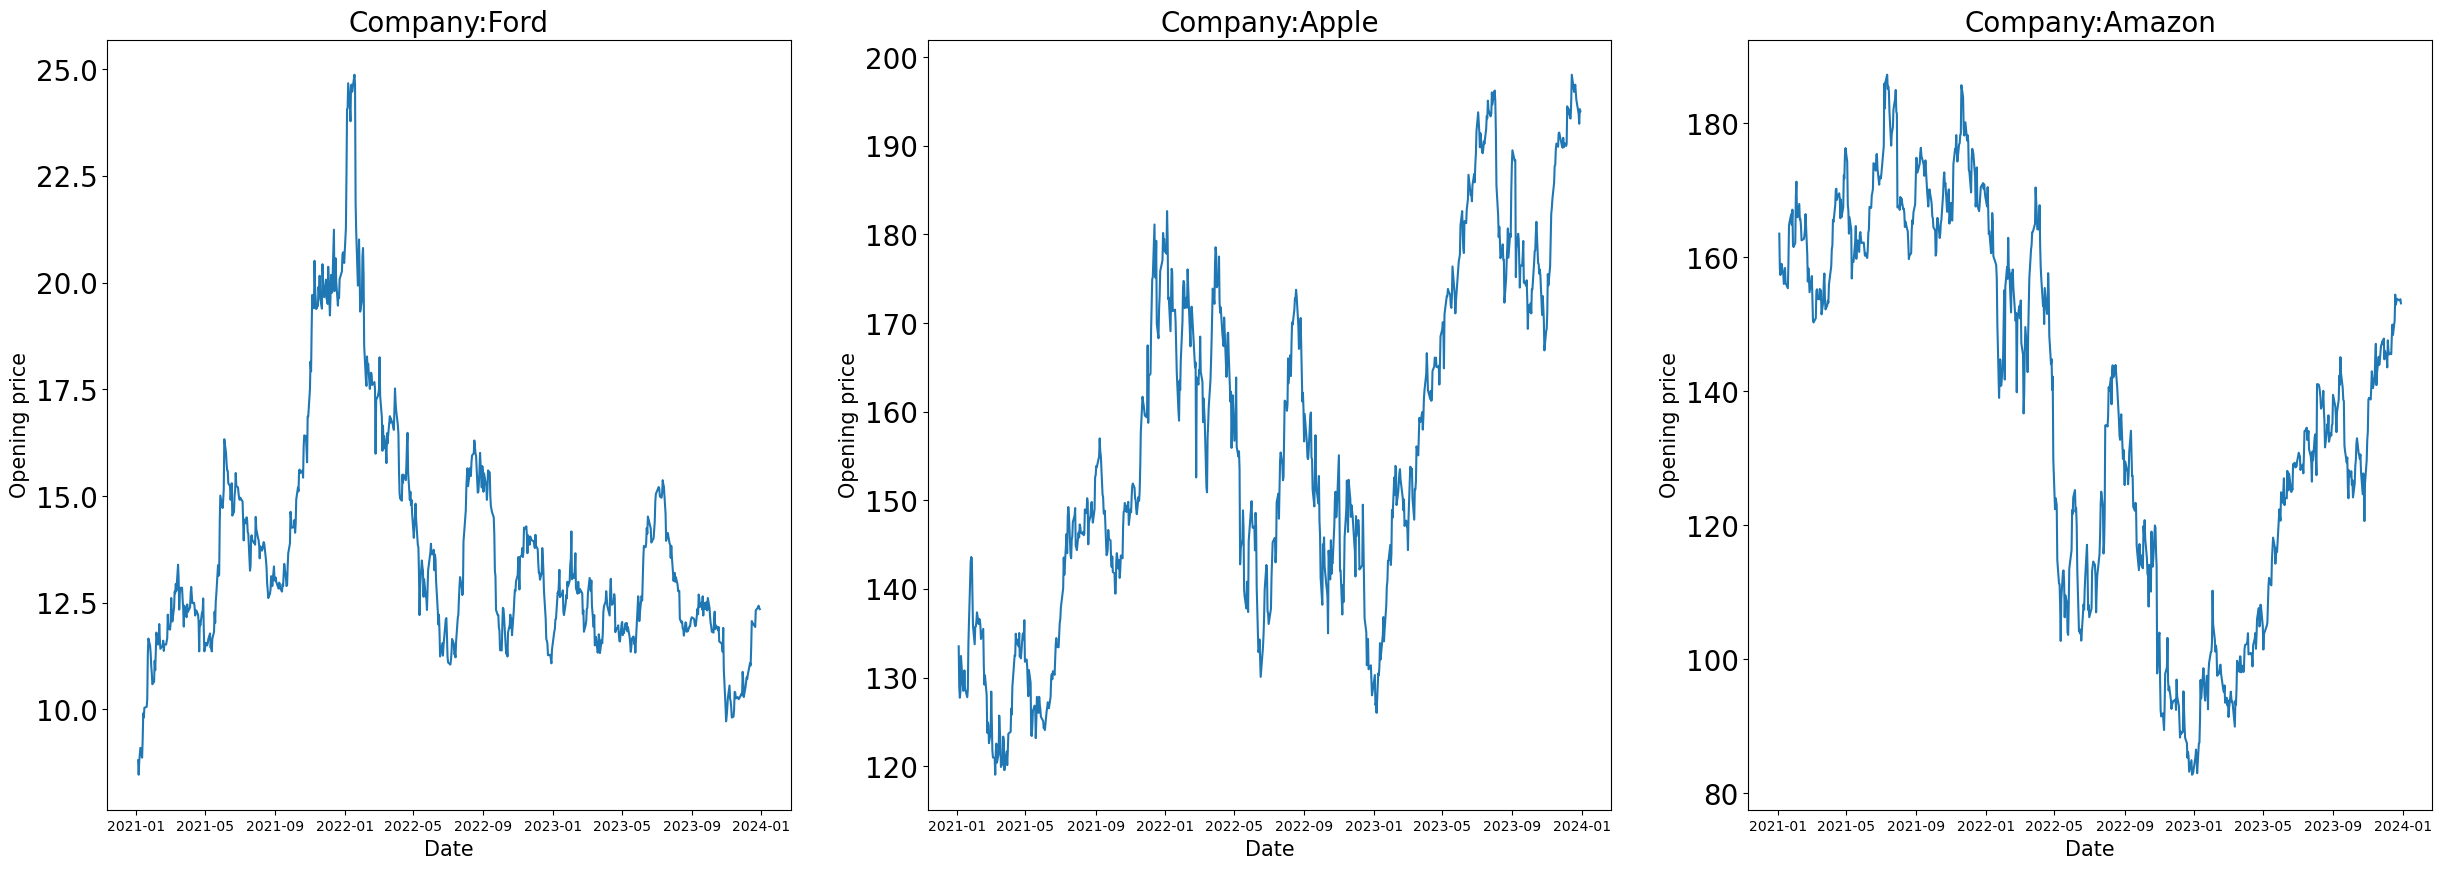

In [25]:
#Why Normalization:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10)) 
plt.subplot(1,3,1) 
plt.title('Company:Ford',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['F'])
plt.subplot(1,3,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])
plt.subplot(1,3,3) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])

In [ ]:
#Why normalization of movement is essential:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[2])

In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform
print(norm_movements)

[[ 0.01650003  0.00112408  0.02412761 ... -0.05829181  0.02601459
   0.02440854]
 [ 0.01625835  0.00739786  0.03029807 ... -0.013849    0.01851234
   0.01243575]
 [ 0.01736826  0.00408665  0.01007064 ... -0.0321097   0.03269341
   0.0253958 ]
 ...
 [ 0.00635339  0.00563137 -0.00144392 ... -0.03494342  0.02541356
   0.02209233]
 [ 0.00865779 -0.04900311  0.00727251 ... -0.01714238  0.02025919
   0.01437196]
 [ 0.02036614 -0.03116602  0.01697178 ... -0.04721235  0.03733769
   0.05214945]]


In [ ]:
from sklearn.cluster import KMeans
kmeas=KMeans(n_clusters=8).fit(norm_movements)
labels=kmeas.predict(norm_movements)


In [27]:
from sklearn.metrics import davies_bouldin_score
db={}
for k in range (2, 15):
    kmeas=KMeans(n_clusters=k).fit(norm_movements)
    labels=kmeas.predict(norm_movements)
    db[k]=davies_bouldin_score(norm_movements,labels)

C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\an

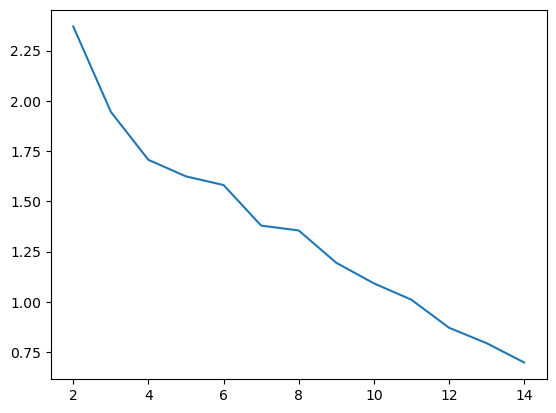

In [28]:
plt.plot(list(db.keys()), list(db.values()))

In [ ]:
from sklearn.metrics import silhouette_score
shs={}
for k in range (2, 10):
    kmeas=KMeans(n_clusters=k).fit(norm_movements)
    labels=kmeas.predict(norm_movements)
    shs[k]=silhouette_score(norm_movements, labels)

In [29]:
#Deciding Optimal Number of Clusters:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, max_iter=10000).fit(norm_movements)
labels=kmeans.predict(norm_movements)

C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


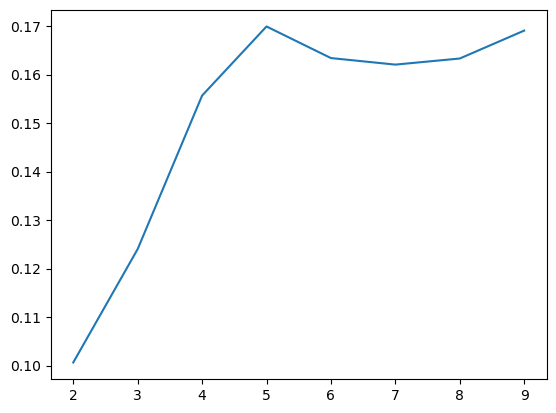

In [30]:
plt.plot(list(shs.keys()), list(shs.values()))

In [31]:
import pandas as pd
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)
print(df1)

    labels          companies
2        0   Northrop Grumman
19       0            Chevron
4        0    Lockheed Martin
6        0              Intel
8        0  Texas Instruments
11       1  General Electrics
18       1              Exxon
9        1         MasterCard
12       1   American Express
15       2  Johnson & Johnson
14       2          Coca Cola
20       3      Valero Energy
16       3             Toyota
0        3             Amazon
10       3          Microsoft
1        3              Apple
7        4                IBM
3        4             Boeing
21       5               Ford
5        5          McDonalds
22       5    Bank of America
17       6              Honda
13       6              Pepsi


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 7,max_iter = 3000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
df2

In [ ]:
#Plotting Decision Boundaries:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(4,4))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 12,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()